Below are three simple Python scripts illustrating the usage of CNN (Convolutional Neural Network), RNN (Recurrent Neural Network), and LSTM (Long Short-Term Memory) using the Keras library. Each script includes a basic model definition, training, and testing.

CNN (Convolutional Neural Network) for Image Classification:

2023-10-23 23:38:49.487388: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 23:38:49.519305: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 23:38:49.519344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 23:38:49.519385: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 23:38:49.526389: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 23:38:49.527165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5


2023-10-23 23:38:56.158530: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


935/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9421

2023-10-23 23:39:10.951332: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


938/938 [==============================] - 16s 16ms/step - loss: 0.2013 - accuracy: 0.9421 - val_loss: 0.0827 - val_accuracy: 0.9745
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0683 - accuracy: 0.9795 - val_loss: 0.0702 - val_accuracy: 0.9769
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0483 - val_accuracy: 0.9843
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0431 - val_accuracy: 0.9855
Epoch 5/5
 54/313 [====>.........................] - ETA: 0s - loss: 0.0762 - accuracy: 0.9763

2023-10-23 23:40:12.476028: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0533 - accuracy: 0.9831
Test accuracy: 0.9830999970436096


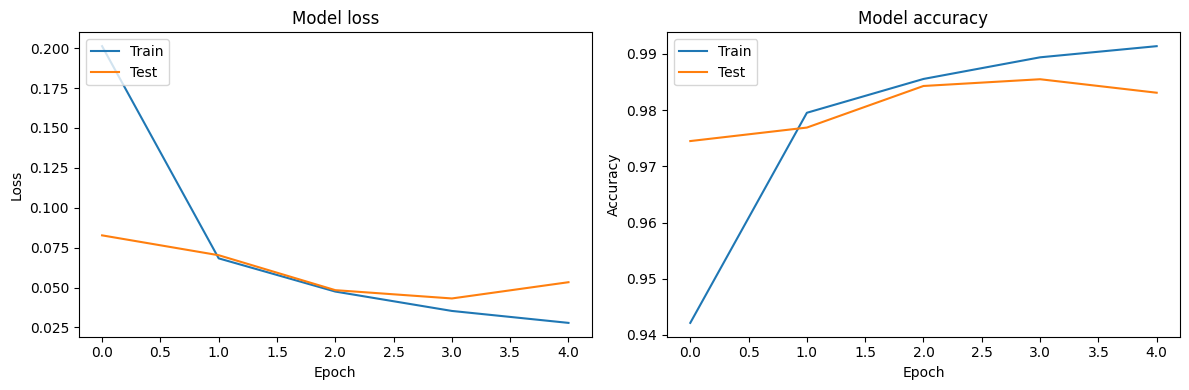

In [3]:
# CNN.py
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


# Test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training & validation loss values
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

RNN (Recurrent Neural Network) for Sequence Classification:

Epoch 1/5
157/157 [==============================] - 26s 156ms/step - loss: 0.6240 - acc: 0.6349 - val_loss: 0.4638 - val_acc: 0.7892
Epoch 2/5
157/157 [==============================] - 24s 154ms/step - loss: 0.4061 - acc: 0.8275 - val_loss: 0.4395 - val_acc: 0.8064
Epoch 3/5
157/157 [==============================] - 24s 154ms/step - loss: 0.3326 - acc: 0.8636 - val_loss: 0.3976 - val_acc: 0.8240
Epoch 4/5
157/157 [==============================] - 24s 153ms/step - loss: 0.2702 - acc: 0.8923 - val_loss: 0.3639 - val_acc: 0.8444
Epoch 5/5
782/782 [==============================] - 23s 29ms/step - loss: 0.3590 - acc: 0.8599
Test accuracy: 0.8599200248718262


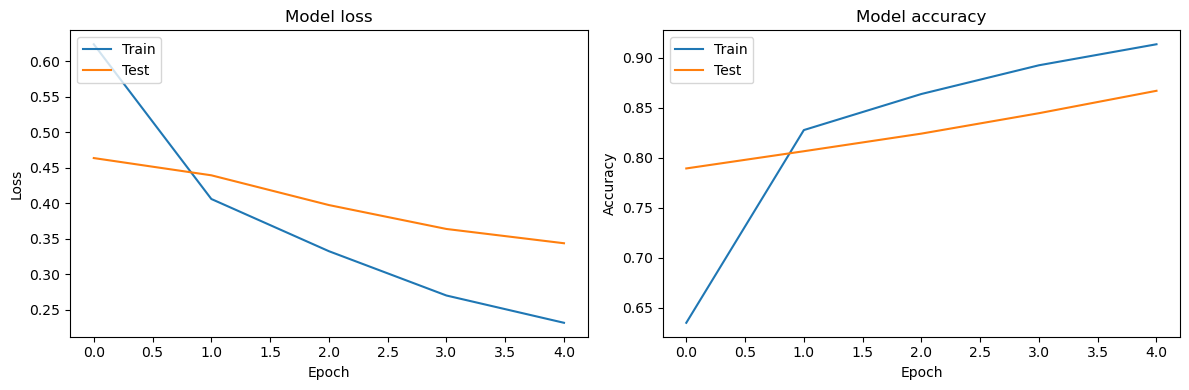

In [2]:
# RNN.py
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding
from keras.preprocessing import sequence

# Load dataset
max_features = 10000
maxlen = 500
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

# Define RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compile and train
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

LSTM (Long Short-Term Memory) for Sequence Classification:


Epoch 1/5
157/157 [==============================] - 65s 397ms/step - loss: 0.5877 - acc: 0.6793 - val_loss: 0.4663 - val_acc: 0.8054
Epoch 2/5
157/157 [==============================] - 62s 396ms/step - loss: 0.3512 - acc: 0.8569 - val_loss: 0.3238 - val_acc: 0.8656
Epoch 3/5
157/157 [==============================] - 62s 398ms/step - loss: 0.2696 - acc: 0.8947 - val_loss: 0.3559 - val_acc: 0.8540
Epoch 4/5
157/157 [==============================] - 66s 424ms/step - loss: 0.2297 - acc: 0.9118 - val_loss: 0.3439 - val_acc: 0.8790
Epoch 5/5
782/782 [==============================] - 60s 76ms/step - loss: 0.3066 - acc: 0.8773
Test accuracy: 0.8773199915885925


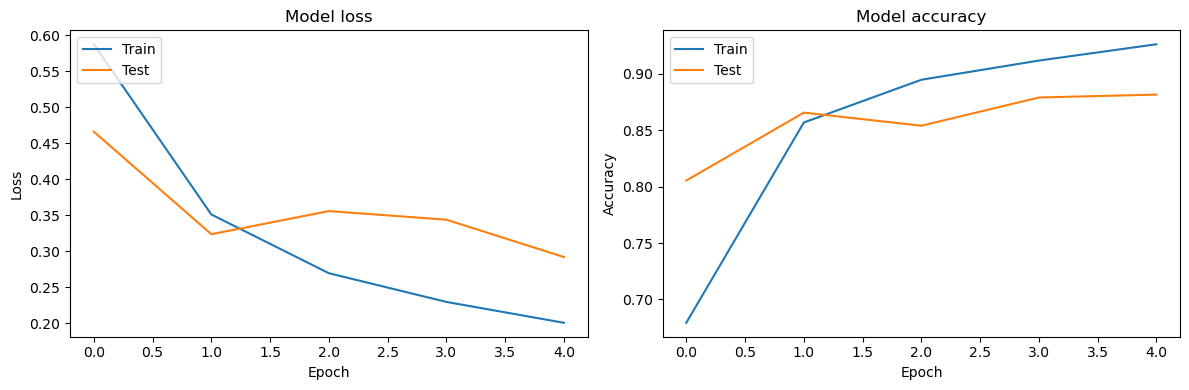

In [3]:
# LSTM.py
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence

# Load dataset
max_features = 10000
maxlen = 500
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

# Define LSTM model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile and train
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)


# Test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()